Входные данные

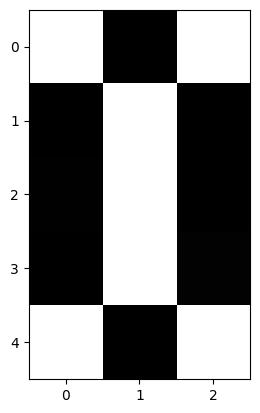

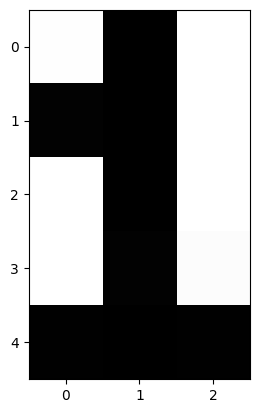

In [ ]:
import math
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

pl = plt.imread('0.jpg')
plt.imshow(pl)
plt.show()

pl2 = plt.imread('1.jpg')
plt.imshow(pl2)
plt.show()

In [ ]:
class SOM:

	def winner(self, weights, x): #Выбор победившего нейрона
		d1 = 0 #Расстояние от вектора до первого нейрона
		d2 = 0 #Расстояние от вектора до второго нейрона
		for i in range(len(x)):
			d1 = d1 + math.pow((x[i] - weights[0][i]), 2)
			d2 = d2 + math.pow((x[i] - weights[1][i]), 2)
		if math.sqrt(d1) < math.sqrt(d2): #Выбор наименьшей дистанции
			return 0
		else:
			return 1

	def new_weights(self, weights, x, win, lr): #Обновление весов
		for i in range(len(weights[0])):
			weights[win][i] = weights[win][i] + lr * (x[i] - weights[win][i])
		return weights

In [ ]:
def image_array(a): #Преобразование изображения в массив из 0 - не закрашен и 1 - закрашен
    i = Image.open(a)
    i_array = np.asarray(i)
    s = []
    for y in range(i_array.shape[0]):
        for x in range(i_array.shape[1]):
            if i_array[(y, x)].sum() >= 384:
                s.append(int(0))
            else:
                s.append(int(1))
    return s

In [ ]:
X = []
X.append(image_array('1.jpg'))
X.append(image_array('0.jpg'))
m, n = len(X), len(X[0])
print(X)
weights = [[0.9, 0.1, 0.6, 0.8, 0.5, 0.1, 0.8, 0.2, 0.6, 0.6, 0.6, 0.9, 0.3, 0.2, 0.7], [0.9, 0.7, 0.1, 0.4, 0.7, 0.8, 0.0, 0.1, 0.0, 0.6, 0.7, 0.6, 0.5, 1.0, 0.9]]
'''
for i in range(2): #Случайный выбор весов
  weights.append([])
  for j in range(n):
    weights[i].append(round(random.random(), 1))
'''
print(weights)

[[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]]
[[0.9, 0.1, 0.6, 0.8, 0.5, 0.1, 0.8, 0.2, 0.6, 0.6, 0.6, 0.9, 0.3, 0.2, 0.7], [0.9, 0.7, 0.1, 0.4, 0.7, 0.8, 0.0, 0.1, 0.0, 0.6, 0.7, 0.6, 0.5, 1.0, 0.9]]


Обучение

In [ ]:
a = SOM()
epochs = 3
lr = 0.6 #Коэффициент скорости обучения
for i in range(epochs):
  print('Эпоха', i)
  for j in range(m): #Для всех входных векторов
    x = X[j]
    win = a.winner(weights, x) #Выбираем нейрон победитель
    weights = a.new_weights(weights, x, win, lr)
  print("Веса : ", weights)
  lr /= 2


Эпоха 0
Веса :  [[0.36, 0.64, 0.24, 0.92, 0.2, 0.64, 0.92, 0.08000000000000002, 0.84, 0.84, 0.24, 0.96, 0.12, 0.6799999999999999, 0.27999999999999997], [0.36, 0.88, 0.04000000000000001, 0.76, 0.88, 0.32000000000000006, 0.0, 0.64, 0.0, 0.24, 0.88, 0.24, 0.8, 1.0, 0.96]]
Эпоха 1
Веса :  [[0.252, 0.748, 0.16799999999999998, 0.9440000000000001, 0.14, 0.748, 0.9440000000000001, 0.05600000000000001, 0.888, 0.888, 0.16799999999999998, 0.972, 0.08399999999999999, 0.7759999999999999, 0.19599999999999998], [0.252, 0.916, 0.028000000000000004, 0.832, 0.916, 0.22400000000000003, 0.0, 0.748, 0.0, 0.16799999999999998, 0.916, 0.16799999999999998, 0.86, 1.0, 0.972]]
Эпоха 2
Веса :  [[0.2142, 0.7858, 0.14279999999999998, 0.9524, 0.11900000000000001, 0.7858, 0.9524, 0.0476, 0.9048, 0.9048, 0.14279999999999998, 0.9762, 0.07139999999999999, 0.8095999999999999, 0.16659999999999997], [0.2142, 0.9286, 0.0238, 0.8572, 0.9286, 0.1904, 0.0, 0.7858, 0.0, 0.14279999999999998, 0.9286, 0.14279999999999998, 0.881, 1

In [ ]:
print("Веса : ", weights)

Веса :  [[0.2142, 0.7858, 0.14279999999999998, 0.9524, 0.11900000000000001, 0.7858, 0.9524, 0.0476, 0.9048, 0.9048, 0.14279999999999998, 0.9762, 0.07139999999999999, 0.8095999999999999, 0.16659999999999997], [0.2142, 0.9286, 0.0238, 0.8572, 0.9286, 0.1904, 0.0, 0.7858, 0.0, 0.14279999999999998, 0.9286, 0.14279999999999998, 0.881, 1.0, 0.9762]]


Предсказание

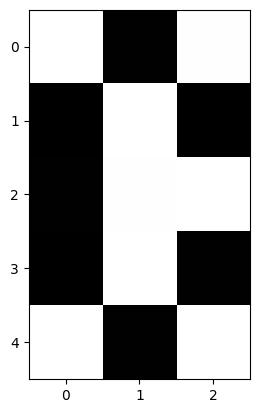

[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0] принадлежит кластеру 0


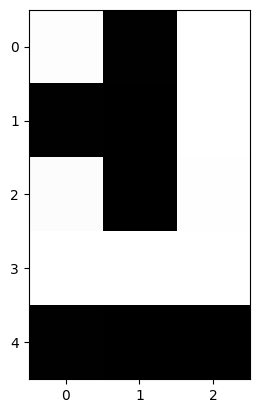

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1] принадлежит кластеру 1


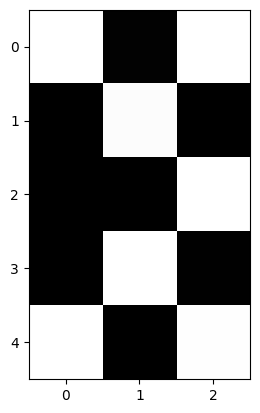

[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0] принадлежит кластеру 0


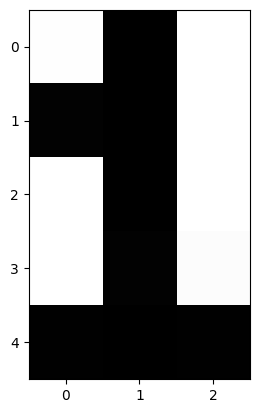

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1] принадлежит кластеру 1


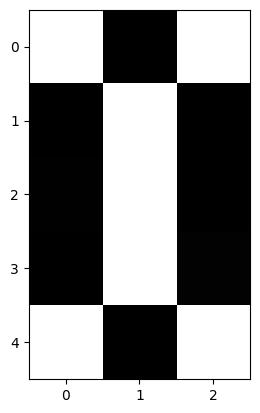

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] принадлежит кластеру 0


In [ ]:
for i in range(1,6):
  pl = plt.imread(f'test{i}.jpg')
  plt.imshow(pl)
  plt.show()
  x = image_array(f'test{i}.jpg')
  print(x, "принадлежит кластеру", a.winner(weights, x))
